# Project Name
Surprise Housing 

# Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.


Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



# libraries used

In [16]:
#numpy
import numpy as np
#pandas
import pandas as pd
#plot
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#load data from csv into data frame
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Explore the Dataset

In [5]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
#function to look at null/blank/NaN/NA values in columns
# Function to count NA / NaN / Null / blank values
def blank_count_check(df):
    # Count NA / NaN / Null values
    null_counts = df.isnull().sum()
    
    # Count blank values
    blank_counts = (df == '').sum()
    
    # Combine the counts into a DataFrame
    total_counts = pd.DataFrame({
        'Column': df.columns,
        'NA/NaN/Null Count': null_counts,
        'Blank Count': blank_counts,
        'Total Count': null_counts + blank_counts 
    })
    
    return total_counts

In [15]:
# Get the counts
na_null_blank_counts = blank_count_check(df)
na_null_blank_counts = na_null_blank_counts[na_null_blank_counts['Total Count']>0]
# Print the counts
print(na_null_blank_counts)

                    Column  NA/NaN/Null Count  Blank Count  Total Count
LotFrontage    LotFrontage                259            0          259
Alley                Alley               1369            0         1369
MasVnrType      MasVnrType                872            0          872
MasVnrArea      MasVnrArea                  8            0            8
BsmtQual          BsmtQual                 37            0           37
BsmtCond          BsmtCond                 37            0           37
BsmtExposure  BsmtExposure                 38            0           38
BsmtFinType1  BsmtFinType1                 37            0           37
BsmtFinType2  BsmtFinType2                 38            0           38
Electrical      Electrical                  1            0            1
FireplaceQu    FireplaceQu                690            0          690
GarageType      GarageType                 81            0           81
GarageYrBlt    GarageYrBlt                 81            0      

- PoolQC        'NA'      1453/1460 - only 7 records has valid data.
- MiscFeature   'NA'      1406/1460 - 
- Alley         'NA'      1369/1460 - has NA value, but this means <b>NA 	No alley access</b>       


<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

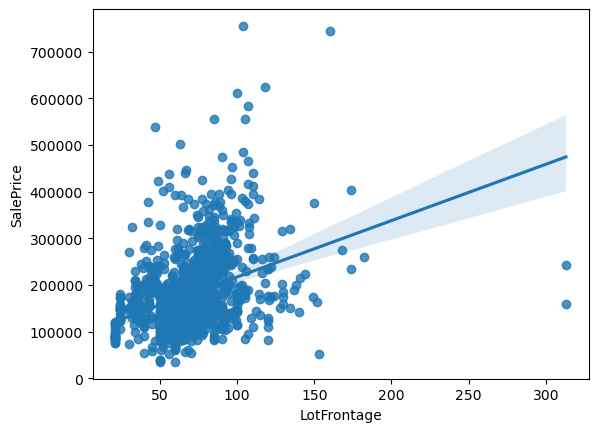

In [17]:
sns.regplot(x='LotFrontage',y='SalePrice', data=df)

# Plotting correlations on numaric independent variables.

In [50]:
num_df = pd.DataFrame()
dftype_dict = df.dtypes.to_dict()
for col,typ in dftype_dict.items():
    #print(col, typ)
    if (typ in ('int64','float64')):
        num_df[col] = df[col]

In [45]:
y_train = num_df.pop('SalePrice')
X_train = num_df
print(X_train.shape)
X_train1 = num_df.iloc[:, :19]
print(X_train1.shape)
# Add y_train back to X_train as a new column
X_train1['SalePrice'] = y_train

X_train2 = num_df.iloc[:, 19:37]
print(X_train2.shape)
# Add y_train back to X_train as a new column
X_train2['SalePrice'] = y_train


(1460, 37)
(1460, 19)
(1460, 18)


<Axes: >

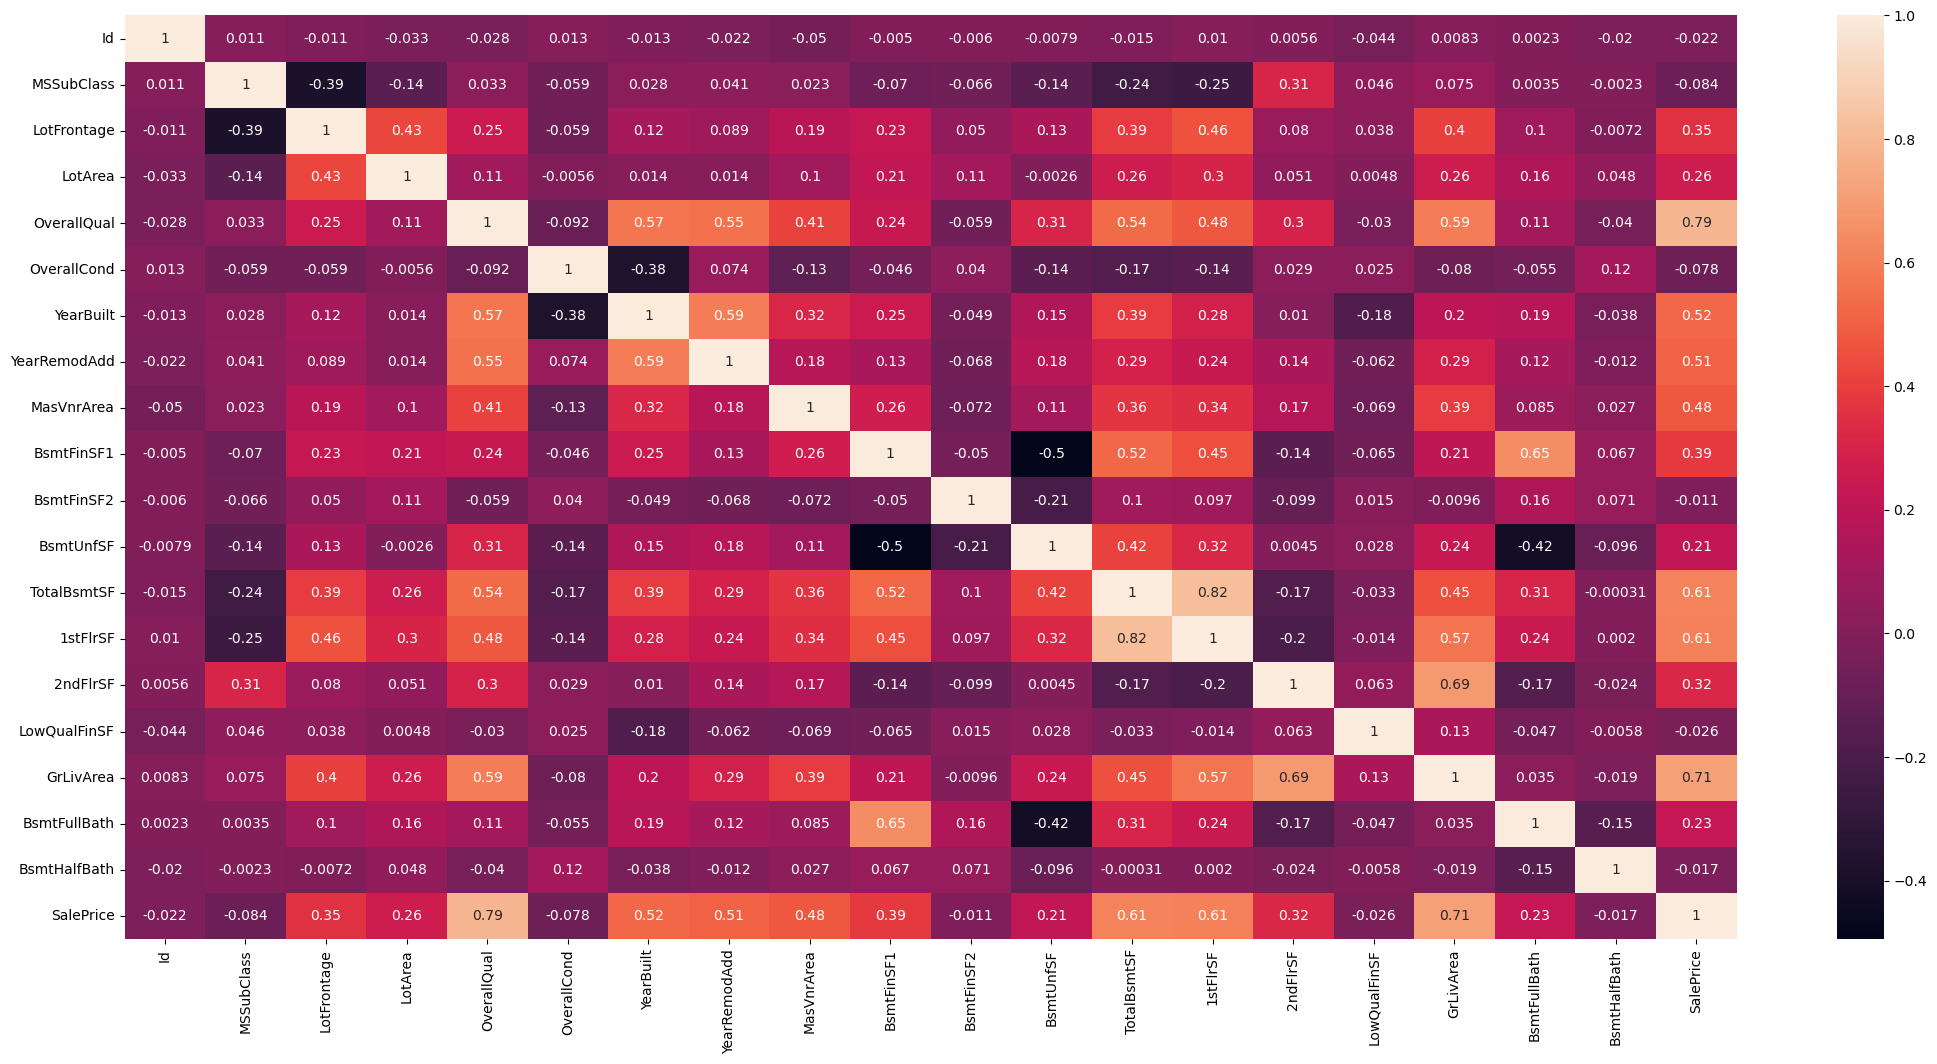

In [48]:
plt.figure(figsize=(26, 12)) 
sns.heatmap(X_train1.corr(), annot=True)  

<Axes: >

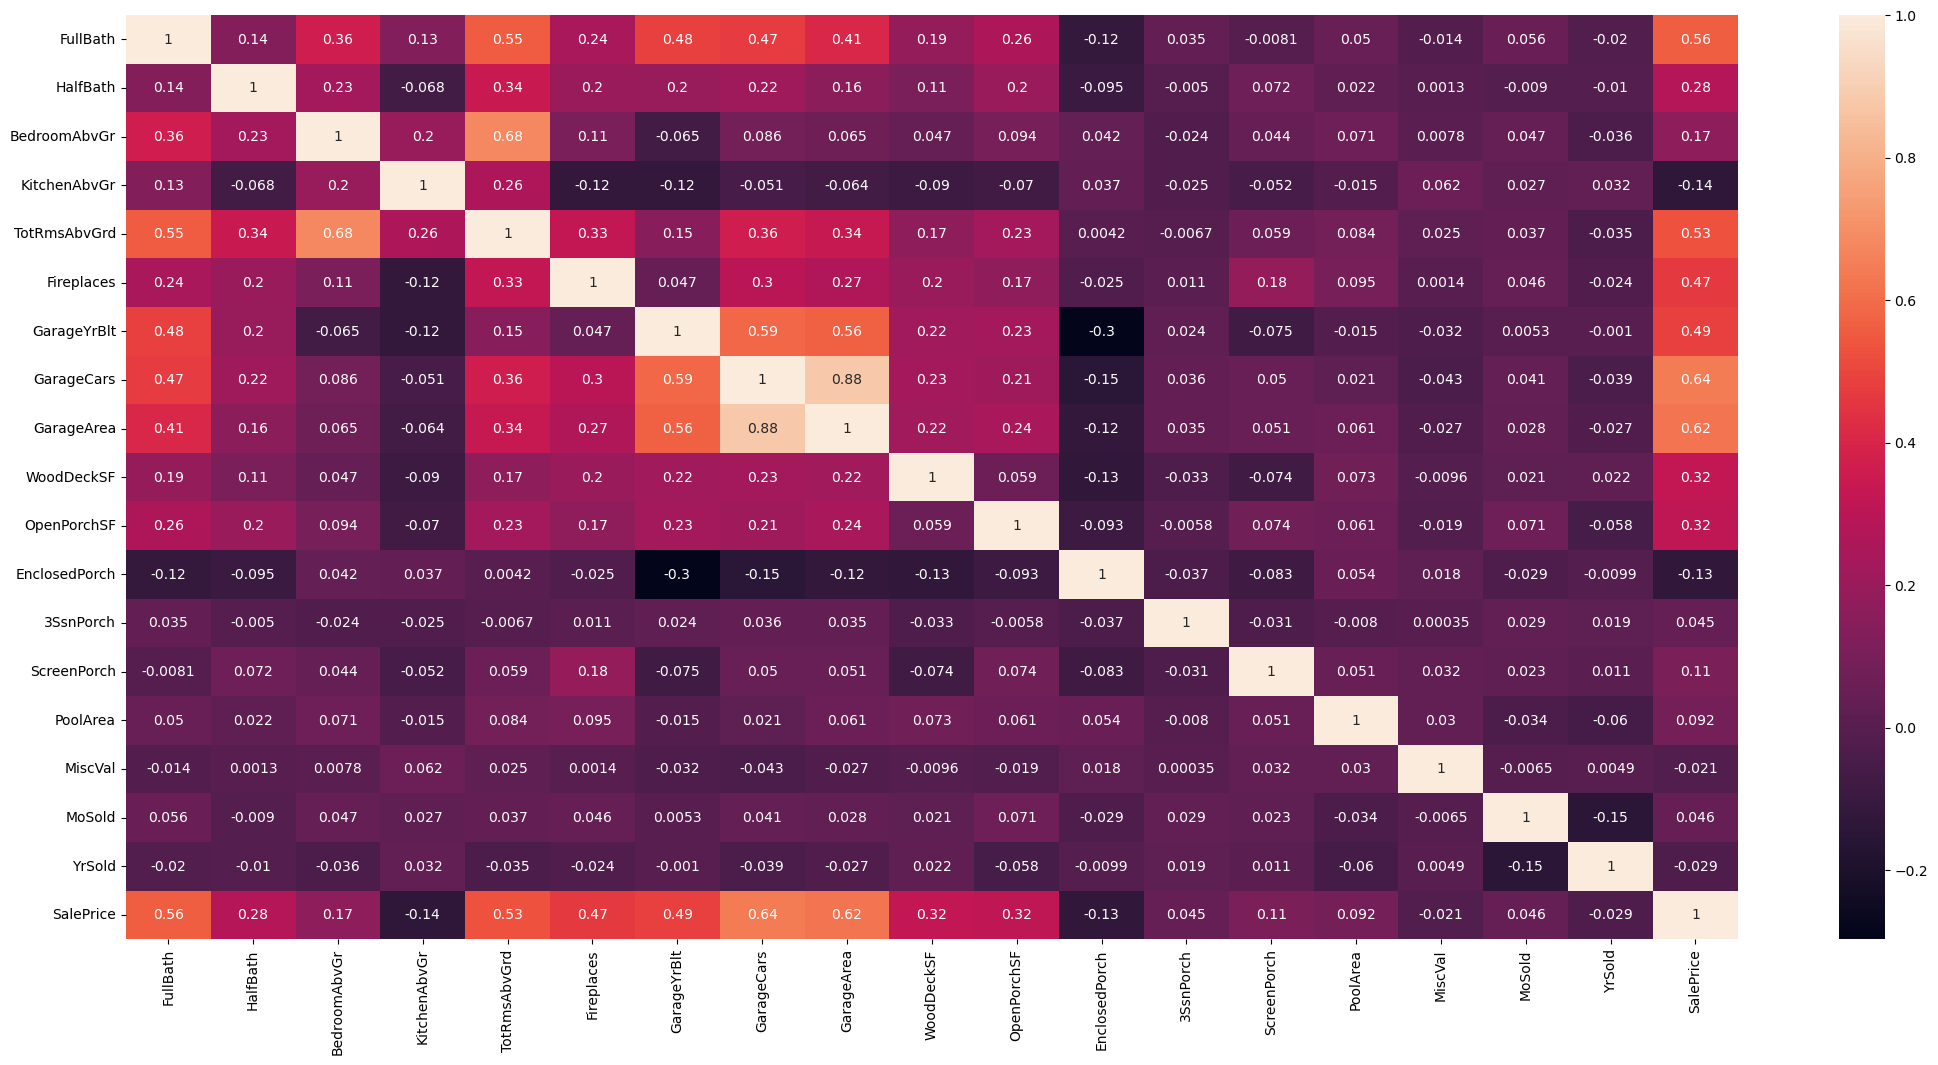

In [47]:
plt.figure(figsize=(26, 12)) 
sns.heatmap(X_train2.corr(), annot=True)  

<Axes: >

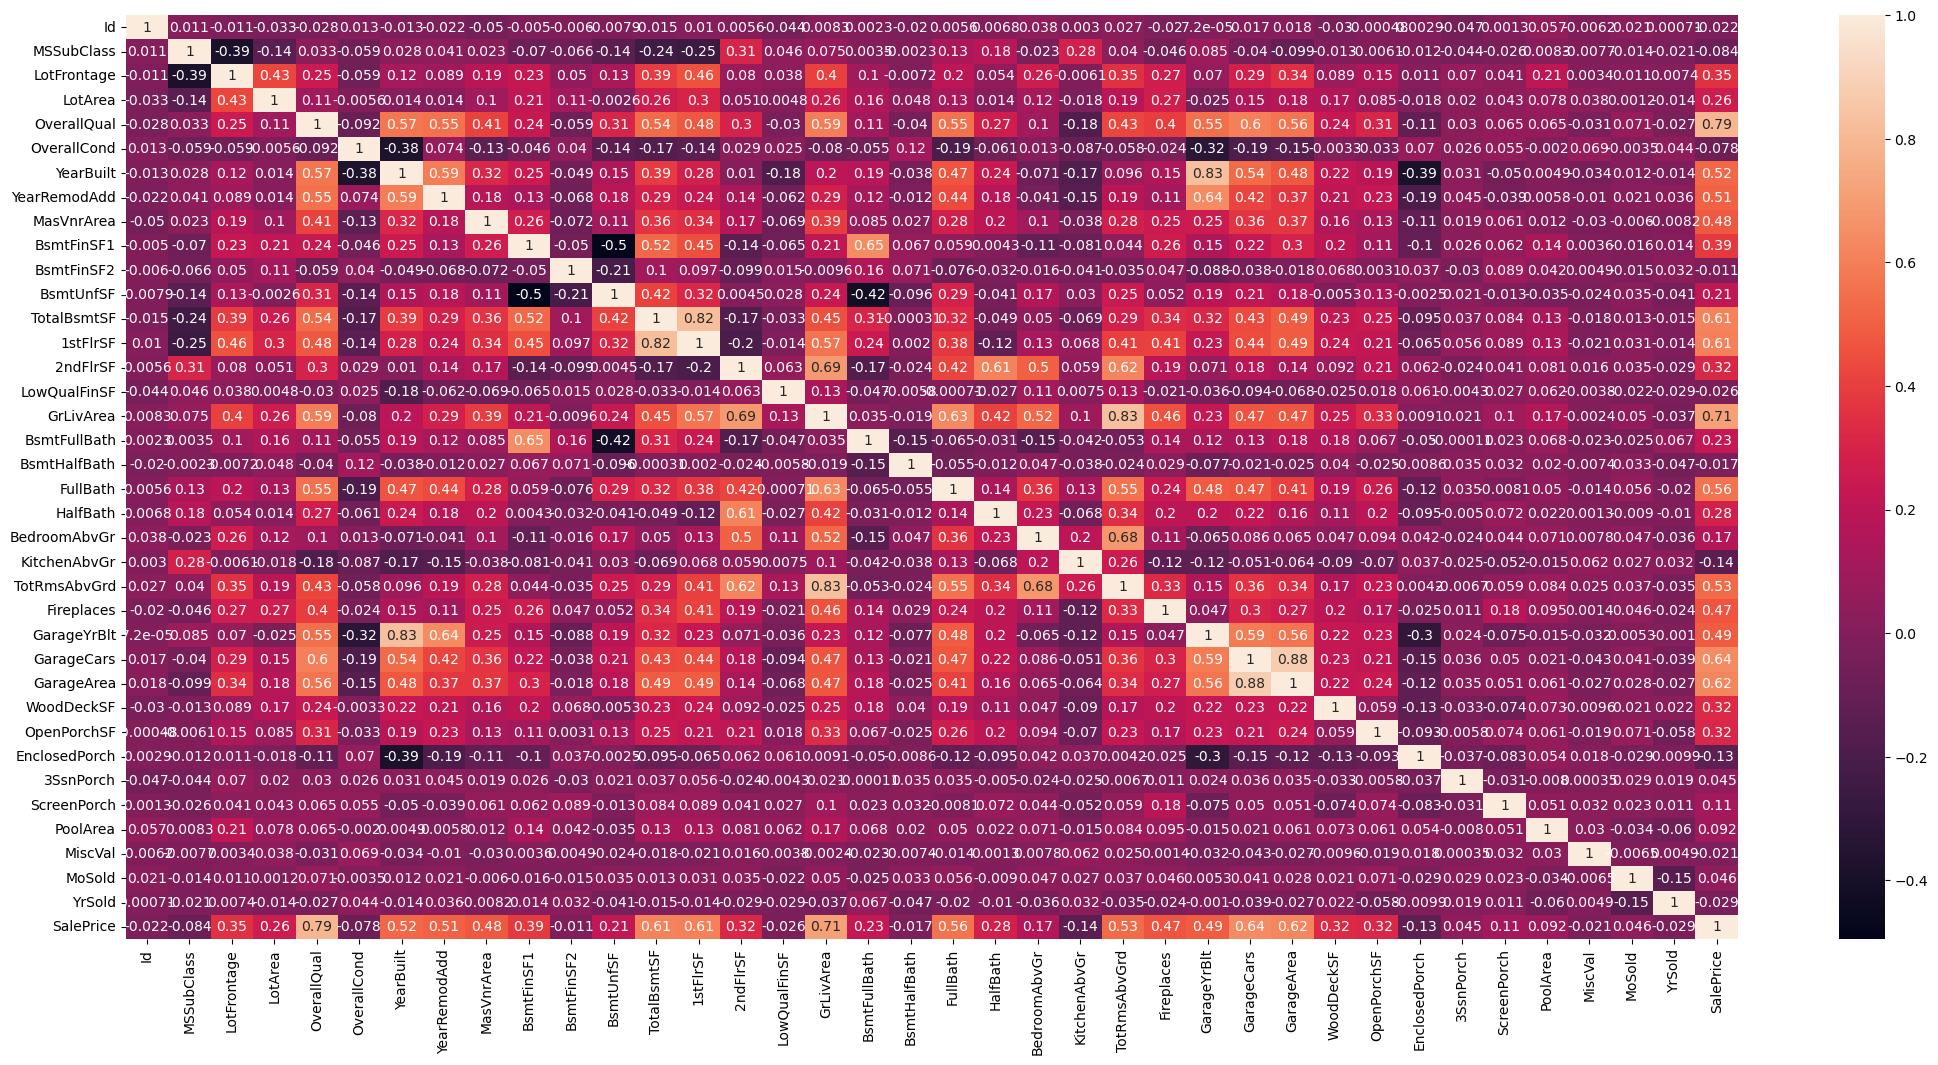

In [26]:
plt.figure(figsize=(26, 12)) 
sns.heatmap(num_df.corr(), annot=True)  

In [24]:
num_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = num_df.drop('SalePrice', axis=1)
y = num_df['SalePrice']
# Add a constant to the model (intercept)
X = sm.add_constant(X)
#fill nan with mean
X.fillna(X.mean(), inplace=True) 
# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        01:01:03   Log-Likelihood:                -17319.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1424   BIC:                         3.490e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.593e+05   1.41e+06      0.325

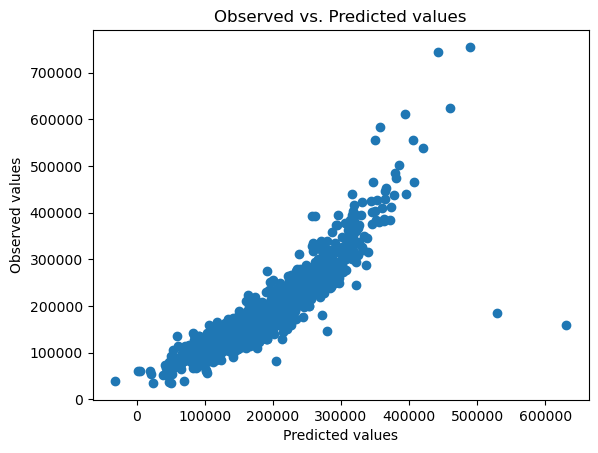

In [53]:
# Plot observed vs. predicted values to check linearity
plt.scatter(model.fittedvalues, y)
plt.xlabel('Predicted values')
plt.ylabel('Observed values')
plt.title('Observed vs. Predicted values')
plt.show()

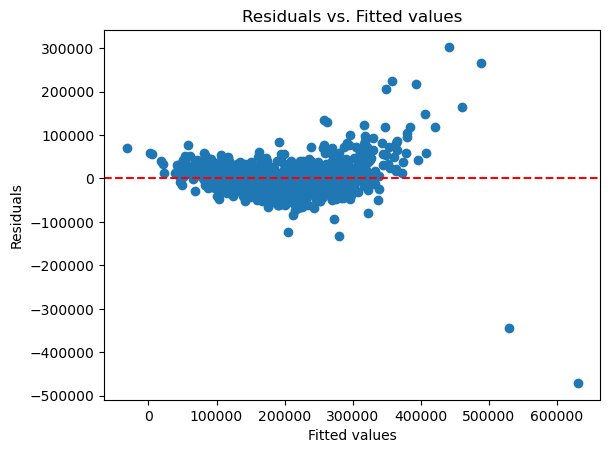

In [54]:
# Plot residuals vs. fitted values to check homoscedasticity
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

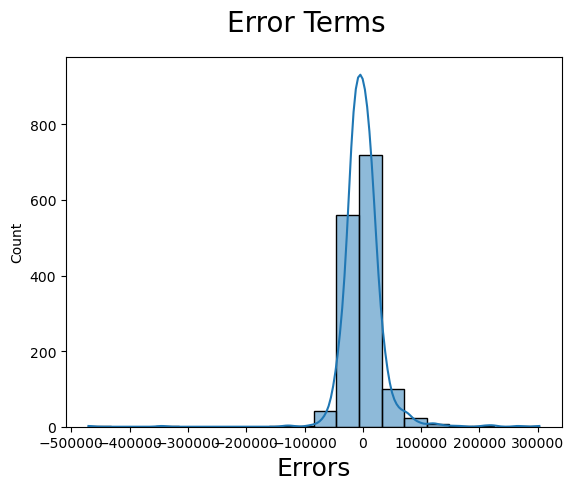

In [56]:


fig = plt.figure()
sns.histplot(model.resid, bins=20, kde=True)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()

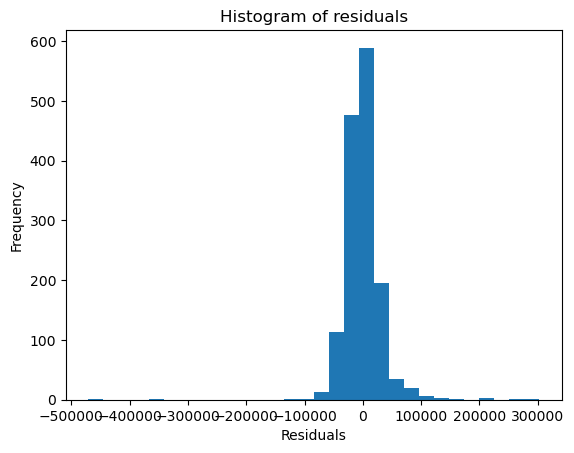

In [55]:
# Histogram of residuals to check normality
plt.hist(model.resid, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()



In [57]:
# Check for multicollinearity using VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


          feature           VIF
0           const  2.416585e+06
1              Id  1.026804e+00
2      MSSubClass  1.657110e+00
3     LotFrontage  1.571589e+00
4         LotArea  1.256787e+00
5     OverallQual  3.265164e+00
6     OverallCond  1.596343e+00
7       YearBuilt  5.029641e+00
8    YearRemodAdd  2.425296e+00
9      MasVnrArea  1.399007e+00
10     BsmtFinSF1           inf
11     BsmtFinSF2           inf
12      BsmtUnfSF           inf
13    TotalBsmtSF           inf
14       1stFlrSF           inf
15       2ndFlrSF           inf
16   LowQualFinSF           inf
17      GrLivArea           inf
18   BsmtFullBath  2.219624e+00
19   BsmtHalfBath  1.153285e+00
20       FullBath  2.951113e+00
21       HalfBath  2.168248e+00
22   BedroomAbvGr  2.329674e+00
23   KitchenAbvGr  1.597118e+00
24   TotRmsAbvGrd  4.889626e+00
25     Fireplaces  1.586110e+00
26    GarageYrBlt  3.370938e+00
27     GarageCars  5.578949e+00
28     GarageArea  5.468729e+00
29     WoodDeckSF  1.220462e+00
30    Op

C:\ProgramData\anaconda4\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame and 'SalePrice' is your dependent variable
# X contains your independent variables
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

# Plot observed vs. predicted values to check linearity
plt.scatter(model.fittedvalues, y)
plt.xlabel('Predicted values')
plt.ylabel('Observed values')
plt.title('Observed vs. Predicted values')
plt.show()

# Plot residuals vs. fitted values to check homoscedasticity
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Q-Q plot to check normality of residuals
sm.qqplot(model.resid, line='45')
plt.title('Q-Q plot')
plt.show()

# Histogram of residuals to check normality
plt.hist(model.resid, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()

# Durbin-Watson test for independence of residuals
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw}')

# Check for multicollinearity using VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [58]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
# We specify this so that the train and test data set always have the same rows, and we can compare the data between runs.
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state = 100)
#df_train.head()
y_train = df_train.pop('SalePrice')
X_train = df_train
print(y_train.shape)
print(X_train.shape)

X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model
#print(lm.summary())
y_train_predict_cnt = lm.predict(X_train)

fig = plt.figure()
sns.histplot((y_train - y_train_predict_cnt), bins=20, kde=True)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()

(1095,)
(1095, 80)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [22]:
np.asarray(df)

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)